# Tp 1 - Initiation

Realisé par Manar Hakoume et Bilel Rahmouni

### Importation

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
fileCapital = pd.read_excel('Capital.xls')
x_axis = fileCapital['Y']
y_axis=fileCapital['X']

### Classification en un nouveau tableau

In [41]:
df = fileCapital
df.columns = ['X','Y','Z']
df.head()

,X,Y,Z
0,Aix en provence,18.94,Sud-Est
1,Ajaccio,22.06,Sud-Est
2,Amiens,17.97,Nord
3,Angers,18.86,Ouest
4,Annecy,14.97,Sud-Est


In [43]:
s = df.Z
counts = s.value_counts()
counts

Ile-de-France    26
Sud-Est          18
Ouest            14
Centre           13
Est              10
Sud-Ouest        10
Nord              9
Name: Z, dtype: int64

In [51]:
percent = s.value_counts(normalize = True).mul(100)
percent

Ile-de-France    26.0
Sud-Est          18.0
Ouest            14.0
Centre           13.0
Est              10.0
Sud-Ouest        10.0
Nord              9.0
Name: Z, dtype: float64

In [63]:
df =pd.DataFrame({'Pourcentage':percent})
df

,Pourcentage
Ile-de-France,26.0
Sud-Est,18.0
Ouest,14.0
Centre,13.0
Est,10.0
Sud-Ouest,10.0
Nord,9.0


### Histogramme 

<AxesSubplot:title={'center':'Histogramme'}>

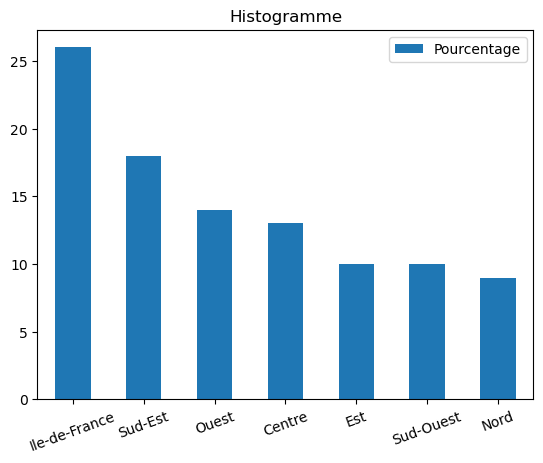

In [117]:
ax =df.plot.bar(y='Pourcentage',rot=20,title='Histogramme')
ax

### Histogramme horizontale

<AxesSubplot:title={'center':'Histogramme'}>

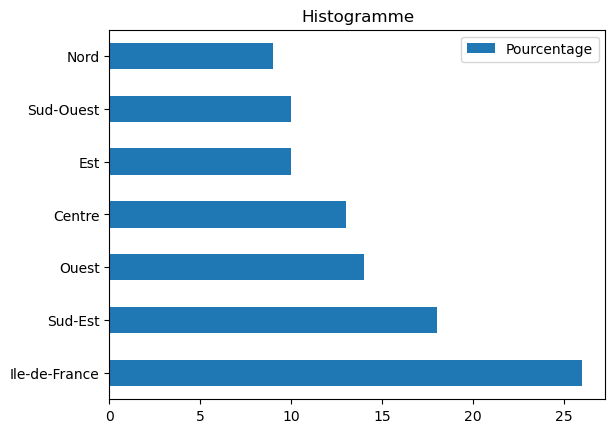

In [128]:
ax =df.plot.barh(y='Pourcentage',rot=0,title='Histogramme')
ax

### Nuages de points

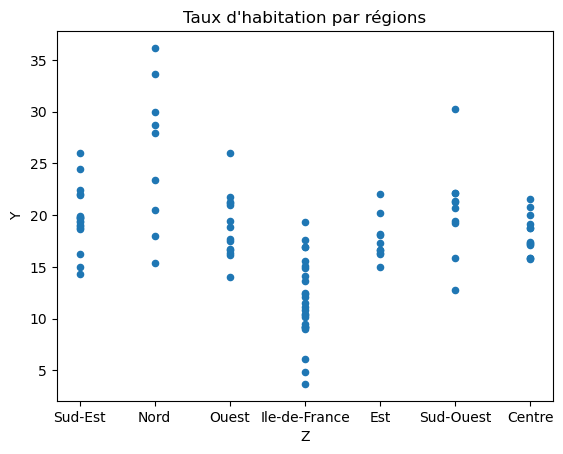

In [137]:
dots = df.plot.scatter(x='Z',y='Y', title="Taux d'habitation par régions")

### Diagramme Circulaire

<AxesSubplot:title={'center':'Diagramme circulaire'}, ylabel='Pourcentage'>

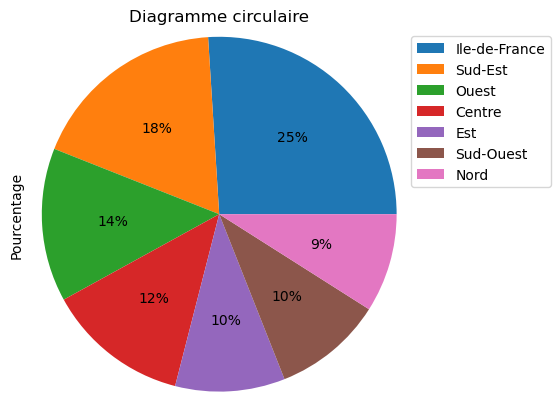

In [126]:
pie =df.plot.pie(y='Pourcentage',radius=1.2,autopct='%1i%%',title='Diagramme circulaire',labeldistance=None)
pie.legend(bbox_to_anchor=(1,1.0),loc='upper left')
pie

La région la plus représentée a partir de ces differents diagrammes est la région de l'Ile de France.

## Statistiques Taxe d'habitation en géneral

### Données

In [131]:
taxe = df.Y
taxe

0     18.94
1     22.06
2     17.97
3     18.86
4     14.97
      ...  
95    18.70
96     8.95
97    29.96
98    19.85
99    11.50
Name: Y, Length: 100, dtype: float64

### Statistiques

In [132]:
taxeMoyenne = taxe.mean()
taxeMoyenne

17.7707

La moyenne de la taxe d'habitation en general est de 17.77

In [133]:
taxeEcartType = taxe.std()
taxeEcartType

5.529599188170711

L'ecart Type de la taxe d'habitation en general est de 5.52

In [134]:
taxe.describe()

count    100.000000
mean      17.770700
std        5.529599
min        3.680000
25%       15.062500
50%       17.625000
75%       20.522500
max       36.170000
Name: Y, dtype: float64

## Statistique des Taxe d'habitation par Region

In [136]:
df.groupby('Z')['Y'].describe()

,count,mean,std,min,25%,50%,75%,max
Z,,,,,,,,
Centre,13.0,18.115385,1.906881,15.77,17.0700,17.370,19.1900,21.55
Est,10.0,17.662000,2.095200,14.98,16.3875,16.975,18.1850,22.04
Ile-de-France,26.0,11.764615,3.879327,3.68,9.2425,11.285,14.7375,19.32
Nord,9.0,25.951111,7.099798,15.37,20.4600,27.970,29.9600,36.17
Ouest,14.0,18.896429,3.098314,14.00,16.6875,18.265,21.0900,25.99
Sud-Est,18.0,19.769444,2.938534,14.30,18.7675,19.575,21.4225,25.98
Sud-Ouest,10.0,20.511000,4.549406,12.72,19.2700,21.010,21.9325,30.23


D'apres les statistiques la région la plus interessante pour le taux de taxe d'habitation est l'ile de france qui présente le taux d'habitation le plus bas.

De plus, la moyenne nationale est de 17.77 donc la region la plus représentative de la moyenne nationale est la régiion de l'EST avec une moyenne de 17.66 .

## Typologie selon la taxe d'habitation

In [138]:
regions = ['Centre','Est','Ile-de-France','Nord','Ouest','Sud-Est','Sud-Ouest']
moyennes = [18.115385,17.662000,11.764615,25.95111,18.896429,19.769444,20.511000]

In [139]:
newData = {'Regions': regions, 'Moyennes': moyennes}
df = pd.DataFrame(newData)
df

,Regions,Moyennes
0,Centre,18.115385
1,Est,17.662000
2,Ile-de-France,11.764615
3,Nord,25.951110
4,Ouest,18.896429
5,Sud-Est,19.769444
6,Sud-Ouest,20.511000


#### Clasification :

In [141]:
def operation(x):
    return(x.mean())

##### Groupe 1

In [142]:
print("Groupe 1 ")
print(regions[0]+', '+regions[1]+', '+regions[4]+', '+regions[5]+', '+regions[6]) 
df.iloc[[0,1,4,5,6],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 1 
Centre, Est, Ouest, Sud-Est, Sud-Ouest


Moyennes    18.990852
dtype: float64

##### Groupe 2

In [143]:
print("Groupe 2 ")
print(regions[2]) 
df.iloc[[2],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 2 
Ile-de-France


Moyennes    11.764615
dtype: float64

##### Groupe 3

In [144]:
print("Groupe 3 ")
print(regions[3]) 
df.iloc[[3],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 3 
Nord


Moyennes    25.95111
dtype: float64

### 30% au dessus de la moyenne de la taxe d'habitation

In [145]:
fileCapital.sort_values('Y',ascending=False).head((round(0.2*len(fileCapital))))

,X,Y,Z
49,Lille,36.17,Nord
91,Tourcoing,33.61,Nord
66,Nimes,30.23,Sud-Ouest
97,Villeneuve-d'Asq,29.96,Nord
39,Dunkerque,28.69,Nord
78,Roubaix,27.97,Nord
21,Brest,25.99,Ouest
45,La Seyne-sur-Mer,25.98,Sud-Est
8,Arles,24.49,Sud-Est
24,Calais,23.36,Nord


### 30% en dessous de la moyenne de la taxe d'habitation 

In [147]:
fileCapital.sort_values('Y').head((round(0.2*len(fileCapital))))

,X,Y,Z
64,Neuilly-sur-Seine,3.68,Ile-de-France
35,Courbevoie,4.86,Ile-de-France
62,Nanterre,6.13,Ile-de-France
96,Versailles,8.95,Ile-de-France
70,Paris,9.15,Ile-de-France
43,Ivry-sur-Seine,9.16,Ile-de-France
81,Saint-Denis,9.17,Ile-de-France
19,Boulogne-Billancourt,9.46,Ile-de-France
9,Asnières-sur-Seine,10.13,Ile-de-France
53,Maisons-Alfort,10.30,Ile-de-France


### 20% au dessus de la moyenne de la taxe d'habitation 

In [148]:
fileCapital.sort_values('Y',ascending=False).head((round(0.3*len(fileCapital))))

,X,Y,Z
49,Lille,36.17,Nord
91,Tourcoing,33.61,Nord
66,Nimes,30.23,Sud-Ouest
97,Villeneuve-d'Asq,29.96,Nord
39,Dunkerque,28.69,Nord
78,Roubaix,27.97,Nord
21,Brest,25.99,Ouest
45,La Seyne-sur-Mer,25.98,Sud-Est
8,Arles,24.49,Sud-Est
24,Calais,23.36,Nord


### 20% en dessous de la moyenne de la taxe d'habitation 

In [149]:
fileCapital.sort_values('Y').head((round(0.3*len(fileCapital))))

,X,Y,Z
64,Neuilly-sur-Seine,3.68,Ile-de-France
35,Courbevoie,4.86,Ile-de-France
62,Nanterre,6.13,Ile-de-France
96,Versailles,8.95,Ile-de-France
70,Paris,9.15,Ile-de-France
43,Ivry-sur-Seine,9.16,Ile-de-France
81,Saint-Denis,9.17,Ile-de-France
19,Boulogne-Billancourt,9.46,Ile-de-France
9,Asnières-sur-Seine,10.13,Ile-de-France
53,Maisons-Alfort,10.30,Ile-de-France
